## The issue regarding the Coursera free courses popularity

**Description**

A new online school decided to promote their courses by creating a free course on the Coursera. They'd like to find out what the course they should make to gain the popularity on the platform.

**The aims of an issue:**

- To find out what influences on the count of course' reviews
- To define the features of the most viewed courses (top-courses)
- To give the recommendation for a future course

**Contents:**
<br>1) [Reading data](#Step1)
<br>2) [Understanding data](#Step2)
<br>3) [Data preparation](#Step3)
<br>4) [Explanatory Data Analysis](#Step4)
<br>5) [Conclusion](#Step5)

<a class="anchor" id="Step1"></a>
### 1. Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/NegOlga/project-coursera/main/courserafree.csv'
data_courses = pd.read_csv(url, index_col=False)

In [3]:
data_courses.head()

,url,price,institution,title,skills you will gain,css-1qajodb,ratings,reviews,level type duration
0,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",Skills you'll gain:,4.8,(18.8k reviews),Mixed · Course · 1-3 Months
1,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",Skills you'll gain:,4.8,(22.5k reviews),Beginner · Course · 1-3 Months
2,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",Skills you'll gain:,4.9,(33.4k reviews),Mixed · Course · 1-3 Months
3,https://www.coursera.org/learn/sciwrite,Free,Stanford University,Writing in the Sciences,"Writing, Communication",Skills you'll gain:,4.9,(6.6k reviews),Beginner · Course · 1-3 Months
4,https://www.coursera.org/learn/introduction-ps...,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",Skills you'll gain:,4.9,(23.3k reviews),Beginner · Course · 1-3 Months


<a class="anchor" id="Step2"></a>
### 2. Understanding data

In [4]:
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   976 non-null    object 
 1   price                 950 non-null    object 
 2   institution           976 non-null    object 
 3    title                976 non-null    object 
 4   skills you will gain  890 non-null    object 
 5   css-1qajodb           890 non-null    object 
 6   ratings               950 non-null    float64
 7   reviews               950 non-null    object 
 8   level type duration   976 non-null    object 
dtypes: float64(1), object(8)
memory usage: 68.8+ KB


In [5]:
data_courses['ratings'].describe()

count    950.000000
mean       4.690105
std        0.186835
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: ratings, dtype: float64

<a class="anchor" id="Step3"></a>
### 3. Data preparation

#### 3.1 Splitting columns

In [6]:
data_courses[['level', 'type', 'duration']] = data_courses['level type duration'].str.split(' · ', expand=True)

In [7]:
data_courses.head()

,url,price,institution,title,skills you will gain,css-1qajodb,ratings,reviews,level type duration,level,type,duration
0,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",Skills you'll gain:,4.8,(18.8k reviews),Mixed · Course · 1-3 Months,Mixed,Course,1-3 Months
1,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",Skills you'll gain:,4.8,(22.5k reviews),Beginner · Course · 1-3 Months,Beginner,Course,1-3 Months
2,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",Skills you'll gain:,4.9,(33.4k reviews),Mixed · Course · 1-3 Months,Mixed,Course,1-3 Months
3,https://www.coursera.org/learn/sciwrite,Free,Stanford University,Writing in the Sciences,"Writing, Communication",Skills you'll gain:,4.9,(6.6k reviews),Beginner · Course · 1-3 Months,Beginner,Course,1-3 Months
4,https://www.coursera.org/learn/introduction-ps...,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",Skills you'll gain:,4.9,(23.3k reviews),Beginner · Course · 1-3 Months,Beginner,Course,1-3 Months


In [8]:
data_courses = data_courses.drop(['url', 'css-1qajodb', 'level type duration'], axis=1)

In [9]:
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 950 non-null    object 
 1   institution           976 non-null    object 
 2    title                976 non-null    object 
 3   skills you will gain  890 non-null    object 
 4   ratings               950 non-null    float64
 5   reviews               950 non-null    object 
 6   level                 976 non-null    object 
 7   type                  976 non-null    object 
 8   duration              976 non-null    object 
dtypes: float64(1), object(8)
memory usage: 68.8+ KB


In [10]:
data_courses = data_courses.rename(columns={'skills you will gain':'skills',
                            data_courses.columns[2]:'title'})

In [11]:
data_courses.head(9)

,price,institution,title,skills,ratings,reviews,level,type,duration
0,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",4.8,(18.8k reviews),Mixed,Course,1-3 Months
1,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",4.8,(22.5k reviews),Beginner,Course,1-3 Months
2,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",4.9,(33.4k reviews),Mixed,Course,1-3 Months
3,Free,Stanford University,Writing in the Sciences,"Writing, Communication",4.9,(6.6k reviews),Beginner,Course,1-3 Months
4,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",4.9,(23.3k reviews),Beginner,Course,1-3 Months
5,Free,Stanford University,Introduction to Statistics,"Basic Descriptive Statistics, Hypothesis, Data...",4.5,(1.3k reviews),Beginner,Course,1-3 Months
6,Free,Stanford University,Stanford Introduction to Food and Health,"Label, Choice, Nutrition",4.7,(25.8k reviews),Beginner,Course,1-3 Months
7,Free,Atlassian,Agile with Atlassian Jira,"Software Engineering, Software, Project, Opera...",4.7,(6.5k reviews),Beginner,Course,1-4 Weeks
8,Free,University of London,"Brand Management: Aligning Business, Brand and...","Corporate Accouting, Customer Success, Strateg...",4.9,(5.9k reviews),Beginner,Course,1-3 Months


In [12]:
data_courses['reviews']=data_courses['reviews'].str.replace(' reviews', '')
data_courses['reviews']=data_courses['reviews'].replace({'k': '*1e3', np.NaN:0}, regex=True).map(pd.eval).astype(int)

In [13]:
data_courses.head()

,price,institution,title,skills,ratings,reviews,level,type,duration
0,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",4.8,18800,Mixed,Course,1-3 Months
1,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",4.8,22500,Beginner,Course,1-3 Months
2,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",4.9,33400,Mixed,Course,1-3 Months
3,Free,Stanford University,Writing in the Sciences,"Writing, Communication",4.9,6600,Beginner,Course,1-3 Months
4,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",4.9,23300,Beginner,Course,1-3 Months


In [14]:
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        950 non-null    object 
 1   institution  976 non-null    object 
 2   title        976 non-null    object 
 3   skills       890 non-null    object 
 4   ratings      950 non-null    float64
 5   reviews      976 non-null    int32  
 6   level        976 non-null    object 
 7   type         976 non-null    object 
 8   duration     976 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 64.9+ KB


#### 3.2. Handling missing values

In [15]:
missing_values = pd.DataFrame(data_courses.isna().sum(), columns = ['missing values, count'])
missing_values['missing values, %'] = round(data_courses.isna().sum()/data_courses.shape[0]*100, 2)
display(missing_values)

,"missing values, count","missing values, %"
price,26,2.66
institution,0,0.00
title,0,0.00
skills,86,8.81
ratings,26,2.66
reviews,0,0.00
level,0,0.00
type,0,0.00
duration,0,0.00


In [16]:
#loooking for the missing values in the column price
data_courses[data_courses['price'].isna()].head()

,price,institution,title,skills,ratings,reviews,level,type,duration
255,NaN,Coursera Project Network,Business Analysis & Process Management,"Business Process, Entrepreneurship, Process, B...",4.3,1300,Beginner,Guided Project,Less Than 2 Hours
256,NaN,Coursera Project Network,Google Ads for Beginners,"Communication, Advertising, Marketing, Google ...",4.5,3200,Beginner,Guided Project,Less Than 2 Hours
303,NaN,Coursera Project Network,Introduction to Microsoft Excel,"Spreadsheet, Data Analysis, Data Analysis Soft...",4.6,810,Intermediate,Guided Project,Less Than 2 Hours
565,NaN,Coursera Project Network,Introduction to Data Analysis using Microsoft ...,"Data Analysis, Analysis, Data Mining, Data Ana...",4.6,342,Intermediate,Guided Project,Less Than 2 Hours
598,NaN,Coursera Project Network,Use Canva to Create Social Media Visuals for B...,"Communication, Research and Design, Entreprene...",4.5,842,Beginner,Guided Project,Less Than 2 Hours


As far as we explore the courses which are available for free, we can delete the rows where the value in the price column isn't defined.

In [17]:
data_courses = data_courses[~data_courses['price'].isna()]

In [18]:
data_courses.isna().sum()

price           0
institution     0
title           0
skills         86
ratings        26
reviews         0
level           0
type            0
duration        0
dtype: int64

In [19]:
#check the missing values in tha columns ratings and reviews
display(data_courses[data_courses['ratings'].isna()].head())
print("The amount of rows where rating is absent and the reviews' count is more than 0 reviews =",
      len(data_courses[(data_courses['reviews'] !=0) & (data_courses['ratings'].isna())]['ratings']))

,price,institution,title,skills,ratings,reviews,level,type,duration
363,Free,Technische Universität München (TUM),Urban Air Mobility,NaN,NaN,0,Intermediate,Course,1-3 Months
474,Free,"University of California, Santa Cruz","AI, Empathy & Ethics",NaN,NaN,0,Beginner,Course,1-4 Weeks
501,Free,University of London,Explore Management Concepts through Metaphor a...,NaN,NaN,0,Beginner,Course,1-4 Weeks
571,Free,University of Illinois at Urbana-Champaign,Le marketing dans un monde numérique,NaN,NaN,0,Beginner,Course,1-4 Weeks
642,Free,Infosec,Introduction to Cybersecurity Foundations,NaN,NaN,0,Beginner,Course,1-4 Weeks


The amount of rows where rating is absent and the reviews' count is more than 0 reviews = 0


There are no missing values of rating in the rows where the count of reviews is more then 0 views. It means that all the absent values are only in the rows with new courses. The new courses are not useful in our issue so we can delete the rows where rating is absent.

In [20]:
data_courses = data_courses[~data_courses['ratings'].isna()]

In [21]:
data_courses.isna().sum()

price           0
institution     0
title           0
skills         66
ratings         0
reviews         0
level           0
type            0
duration        0
dtype: int64

In [22]:
#fill the missing values in the column skills
data_courses['skills'] = data_courses['skills'].fillna('Undefined')

In [23]:
data_courses.isna().sum()

price          0
institution    0
title          0
skills         0
ratings        0
reviews        0
level          0
type           0
duration       0
dtype: int64

In [24]:
data_courses.shape

(924, 9)

In [25]:
#check the duplicates()
data_courses.duplicated().sum()

0

<a class="anchor" id="Step4"></a>
### 4. Explanatory Data Analysis

#### 4.1. Functions

In [26]:
def distplot(data, axes, columns=[]):
    sns.distplot(x=data[columns], ax=axes)
    axes.set_title(f'{columns} histogram')
    axes.set_xlabel(f'{columns}')

In [27]:
def boxplot(data, axes, columns=[]):
    sns.boxplot(x=data[columns], ax=axes)
    axes.set_title(f'{columns} boxplot')

In [28]:
# function for histograms and boxplots creating
def distribution_variable(data, title):
    fig, ax = plt.subplots(2,2, figsize=(15,10))
    
    distplot(data, axes=ax[0][0], columns='ratings')
    distplot(data, axes=ax[1][0], columns='reviews')


    boxplot(data, axes=ax[0][1], columns='ratings')
    boxplot(data, axes=ax[1][1], columns='reviews')


    fig.suptitle(title, fontsize=16)
    plt.show()

In [29]:
# body of a barplot
def body_plot_func_general(data, columns, axes, labels=False, text=[]):
    grouped_rating = data.groupby(by=columns)['reviews'].median().sort_values(ascending=False).reset_index()
    sns.barplot(grouped_rating[columns], grouped_rating['reviews'], palette='bright', ax=axes).grid(axis= 'y')
    plt.title(f'Distribution of reviews by {columns} {text}', fontsize=12)
    
    if labels == True:
        for i, reviews in enumerate(grouped_rating['reviews']):
            plt.text(i, reviews+1, round(reviews), horizontalalignment='center', fontsize=10)

In [30]:
# barplot function
def barplot_characteristics_by_reviews(data_1, data_2, labels=False, columns=[]):
    plt.figure(figsize=(15,6))
    
    ax1 = plt.subplot(1, 2, 1)
    body_plot_func_general(data_1, columns, ax1, labels, text='no outliers')
    
    ax2 = plt.subplot(1, 2, 2)
    body_plot_func_general(data_2, columns, ax2, labels, text='with outliers')
    
    plt.suptitle(f'Distribution of reviews by {columns}', fontsize=18)
    plt.show()

In [31]:
#body of a top-10 barplot
def body_plot_func(data, columns, axes):
    data_grouped=(data.groupby(by=columns)['reviews'].median().reset_index()
    .sort_values(by='reviews', ascending=False).head(10))
    
    sns.barplot(data_grouped[columns], data_grouped['reviews'], palette='bright', ax=axes)\
        .set(title=f"Top-10 {columns} by courses' reviews")
    
    for i, reviews in enumerate(data_grouped['reviews'][:10]):
        plt.text(i, reviews, round(reviews), horizontalalignment='center', fontsize=10)
        
    plt.gca().set_xticklabels(data_grouped[columns].unique(), rotation=9, horizontalalignment= 'right')

In [32]:
#top-10 barplot function
def barplot_charact_top_10(data_1, data_2, columns=[]):
    plt.figure(figsize=(15,18))
    
    ax1 = plt.subplot(2,1,1)
    body_plot_func(data_1, columns, ax1)
    
    ax2 = plt.subplot(2,1,2)
    body_plot_func(data_2, columns, ax2)
    
    plt.suptitle(f"Top-10 {columns} by median courses' reviews", fontsize=18)
    plt.show()

In [33]:
#splitting skills function
def skills(data):
    dict_skills = {}
    for x in data.values:
        skills = x[3]
        reviews = x[5]
        skills_list = skills.split(', ')
        for skill in skills_list:
            if skill in dict_skills:
                dict_skills[skill] += reviews
            else:
                dict_skills[skill] = reviews
                
    skills_data = pd.DataFrame(dict_skills.items(), columns=['skills', 'reviews']).sort_values('reviews', ascending=False)
    return skills_data

In [34]:
# duration category function
def category(x):
    if x == '1-4 Weeks':
        return '<1 Month'
    elif x == '1-3 Months':
        return '<3 Month'
    elif x == '3-6 Months':
        return '<6 Month'

#### 4.2. Distribution 

In [35]:
data_courses.head()

,price,institution,title,skills,ratings,reviews,level,type,duration
0,Free,University of Alberta,Indigenous Canada,"Business Psychology, Communication, History, E...",4.8,18800,Mixed,Course,1-3 Months
1,Free,Yale University,Financial Markets,"Business Psychology, Data Analysis, Market (Ec...",4.8,22500,Beginner,Course,1-3 Months
2,Free,Yale University,The Science of Well-Being,"Gratitude, Meditation, Planning, Mindfulness",4.9,33400,Mixed,Course,1-3 Months
3,Free,Stanford University,Writing in the Sciences,"Writing, Communication",4.9,6600,Beginner,Course,1-3 Months
4,Free,Yale University,Introduction to Psychology,"Business Psychology, Psychology, Psychologies,...",4.9,23300,Beginner,Course,1-3 Months


In [36]:
data_courses.describe()

,ratings,reviews
count,924.000000,924.000000
mean,4.695887,1240.281385
std,0.184926,3864.473328
min,3.300000,6.000000
25%,4.600000,143.000000
50%,4.700000,415.500000
75%,4.800000,1100.000000
max,5.000000,82500.000000


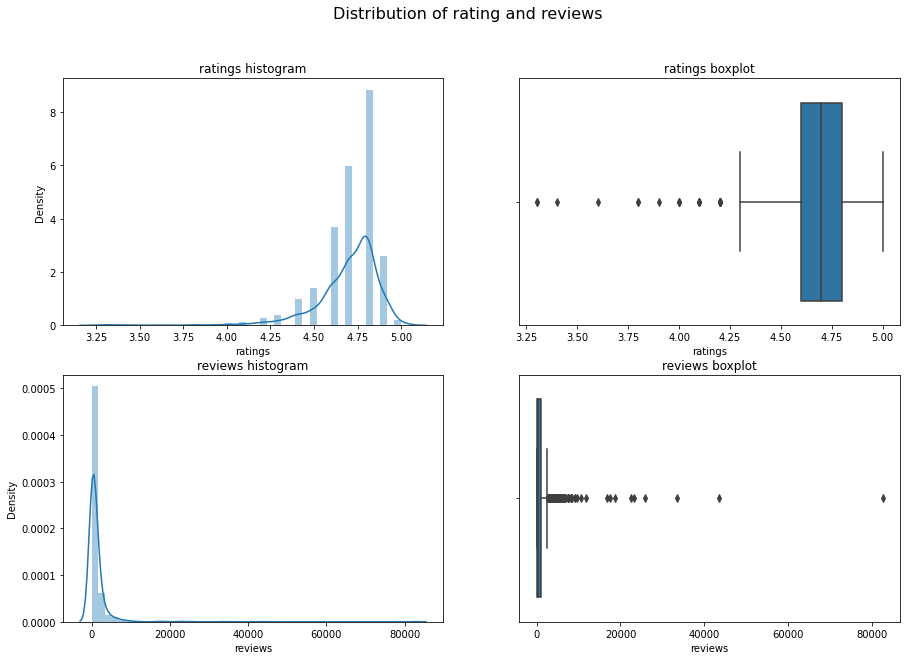

In [37]:
distribution_variable(data_courses, title='Distribution of rating and reviews')

In [38]:
#skewness
testDict = {}
for col in data_courses[['ratings', 'reviews']]:
    skew = data_courses[col].skew()
    testDict[col] = (skew, np.abs(skew))

In [39]:
pd.DataFrame(testDict, index = ['Skewness', 'Abs_Skew']).T.sort_values(by = 'Abs_Skew', ascending = False)

,Skewness,Abs_Skew
reviews,13.182788,13.182788
ratings,-2.563425,2.563425


We can observe that the column 'reviews' is right-skewed. The column 'ratings' has a skewness to the left. 

Also, the column 'reviews' has a lot of outliers. Outliers will be defined by values that are outside of 1.5 times Inter Quartile Range (IQR). We extract the outliers in this issue to find out the real median meanings of rating and reviews and also to consider the most popular courses in details.

In [40]:
#restrictions on rating
Q1_rating = data_courses['ratings'].quantile(0.25)
Q3_rating = data_courses['ratings'].quantile (0.75)

IQR = Q3_rating - Q1_rating

In [41]:
data_courses_nooutliers = data_courses\
[(data_courses['ratings']>(Q1_rating - 1.5*IQR)) & (data_courses['ratings']<(Q3_rating + 1.5*IQR))]

In [42]:
#restrictions on reviews
Q1_rating = data_courses['reviews'].quantile(0.25)
Q3_rating = data_courses['reviews'].quantile (0.75)

IQR = Q3_rating - Q1_rating

In [43]:
data_courses_nooutliers = data_courses[(data_courses['reviews']>(Q1_rating - 1.5*IQR)) & (data_courses['reviews']<(Q3_rating + 1.5*IQR))]
data_courses_outliers = data_courses[(data_courses['reviews']<(Q1_rating - 1.5*IQR)) | (data_courses['reviews']>(Q3_rating + 1.5*IQR))]

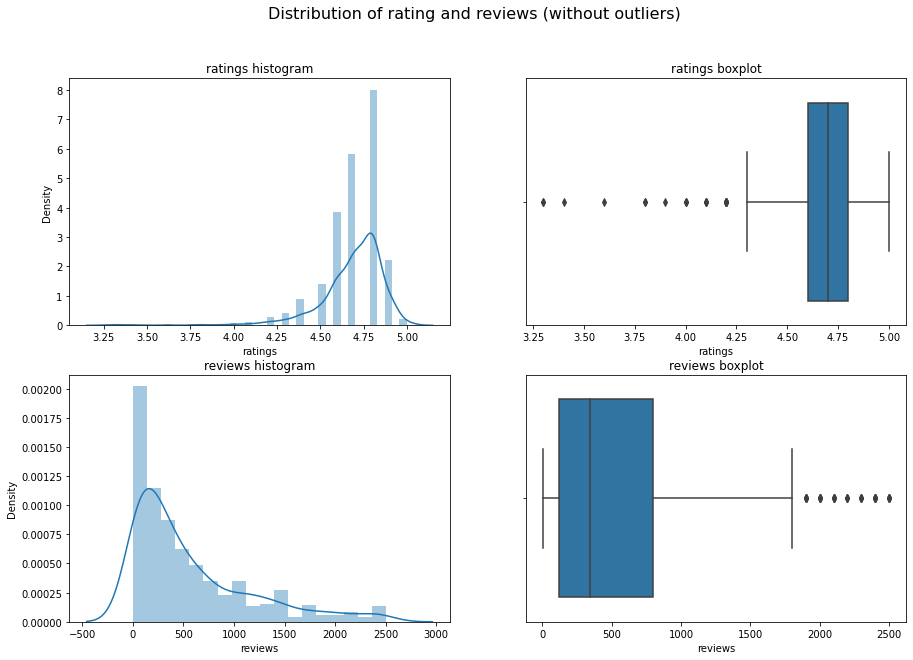

In [44]:
distribution_variable(data_courses_nooutliers, title='Distribution of rating and reviews (without outliers)')

**Conclusion:**
<br>
<br>- rating of the most courses is between 4.25 and 5.00. The median value for rating is around 4.7
<br>- the most courses have from 0 to 1800 reviews. The median value is around 400 reviews. 3/4 of courses have less than 1000 views.
    
We can mention that less then a half of courses get 500 reviews. Less then 3/4 of courses gain more than 1000 views. So we should find out the characteristics of a potential popular course (the course which gains more than the median count of reviews).

### 4.3. The dependence between reviews and other characteristics

First of all, we should understand if the dependence between reviews and other characteristics exists. Also, we should define the most popular meanings of each characteristic to create the portrait of the course which have a possibility to gain the most reviews. To find regular meanings of each charactericstic we'll use the table data_courses_nooutliers. To find the features of top courses we'll use the table data_courses_outliers.

In [45]:
data_courses_nooutliers.head()

,price,institution,title,skills,ratings,reviews,level,type,duration
5,Free,Stanford University,Introduction to Statistics,"Basic Descriptive Statistics, Hypothesis, Data...",4.5,1300,Beginner,Course,1-3 Months
11,Free,Stanford University,Organizational Analysis,"Network Analysis, Communication, Entrepreneurs...",4.6,1200,Beginner,Course,1-3 Months
12,Free,Yale University,Managing Emotions in Times of Uncertainty & St...,"Entrepreneurship, Communication, Leadership an...",4.8,1900,Beginner,Course,1-3 Months
13,Free,Stanford University,International Women's Health and Human Rights,"Supply Chain and Logistics, Entrepreneurship, ...",4.9,1300,Beginner,Course,3-6 Months
17,Free,"University of Maryland, College Park",Cybersecurity for Everyone,"Computer Architecture, Network Architecture, C...",4.7,337,Beginner,Course,1-3 Months


**4.3.1. Dependence between ratings and reviews**

In [46]:
print('Correlation between ratings and reviews for regular courses:',\
      round(data_courses_nooutliers['ratings'].corr(data_courses_nooutliers['reviews']),2))
print('Correlation between ratings and reviews for top courses:',\
      round(data_courses_outliers['ratings'].corr(data_courses_outliers['reviews']),2))

Correlation between ratings and reviews for regular courses: 0.22
Correlation between ratings and reviews for top courses: 0.12


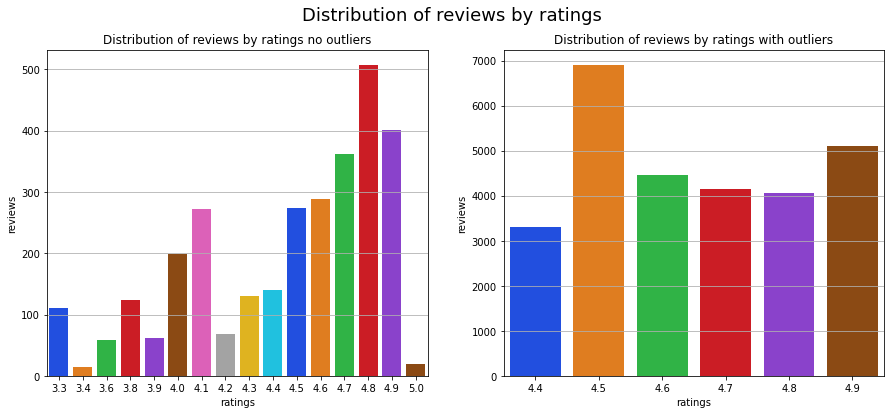

In [47]:
barplot_characteristics_by_reviews(data_courses_nooutliers, data_courses_outliers, columns='ratings')

The rating doesn't influence on the amount of reviews. The most common rating for usual courses is 4.8. For popular courses the most popular rating is 4.6. There are no popular courses with rating 5.0

In [48]:
data_courses_nooutliers[data_courses_nooutliers['ratings'] == 5]['reviews'].unique()

array([ 7,  6, 14, 24, 43, 38, 42])

We can mention that the amount of reviews for the courses with rating 5.0 is extremly low. So we can say that the best possible rating for a popular course is 4.9.

**4.3.2 Institutions and reviews**

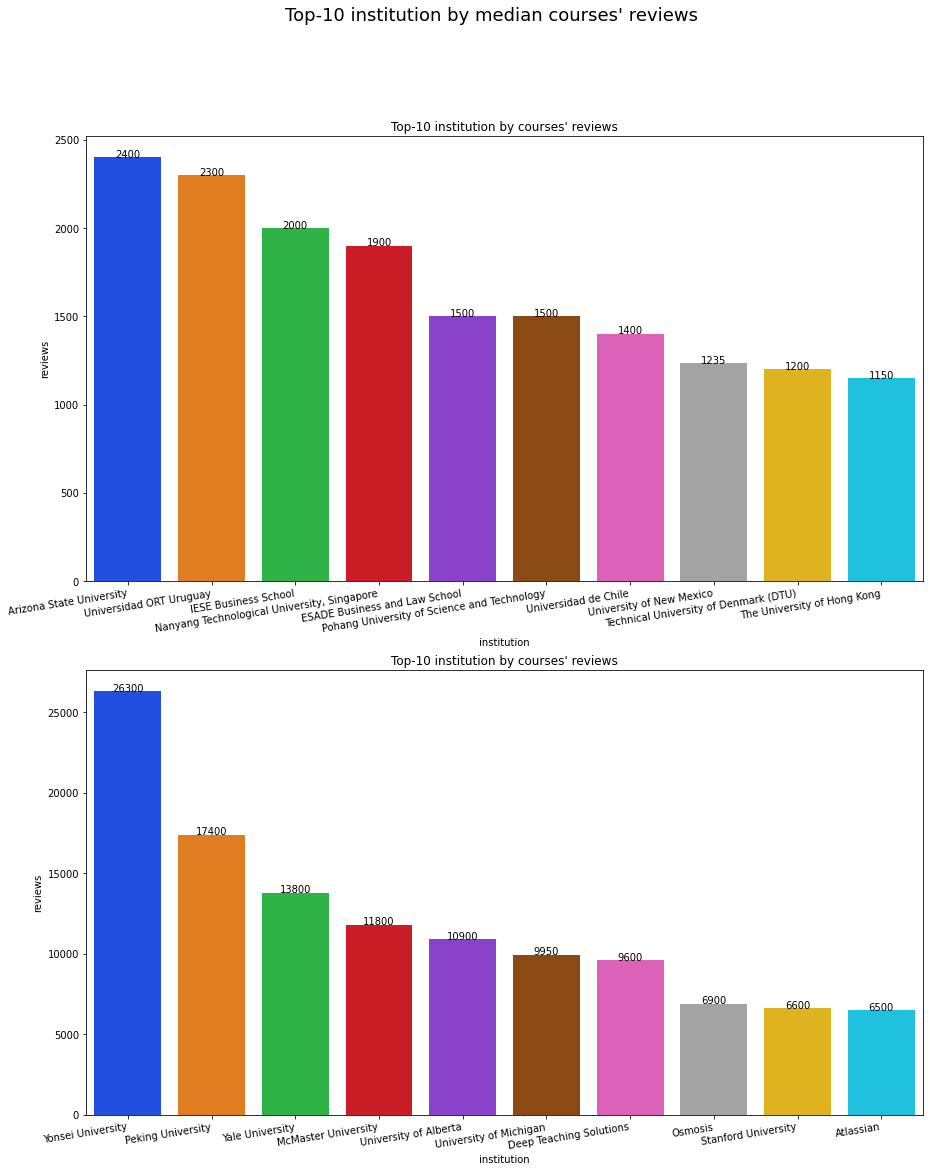

In [49]:
barplot_charact_top_10(data_1 = data_courses_nooutliers , data_2 = data_courses_outliers, columns='institution')

The insitutions which have a lot of top-courses' reviews don't match with the universities which have high median amount of reviews. The most popular courses are from Yonsei University, Peking University and Yale University. We can mention a tendency - the courses from famous universities gain more reviews.

**4.3.2 Skills and reviews**

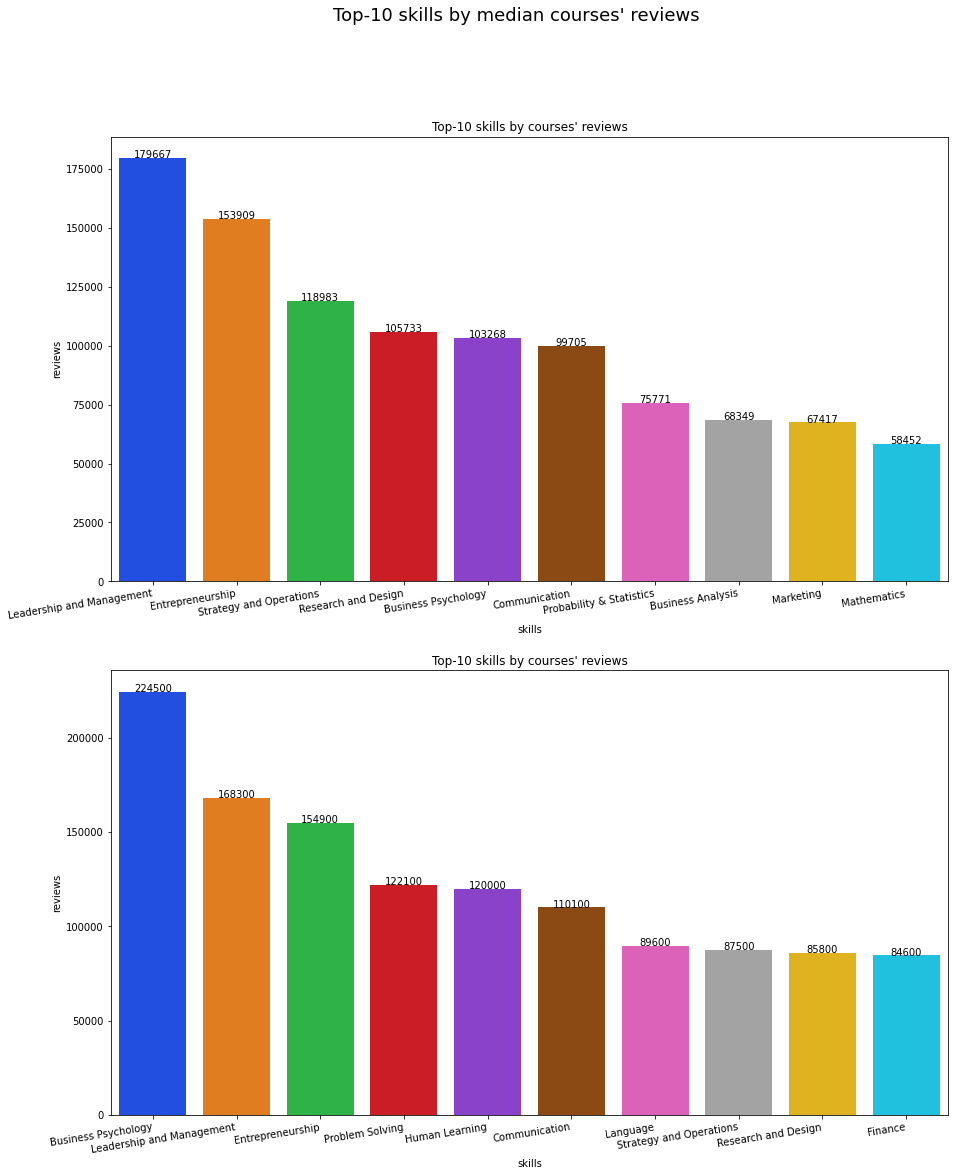

In [50]:
barplot_charact_top_10(data_1= skills(data_courses_nooutliers), data_2=skills(data_courses_outliers), columns='skills')

There are some skills that are actual for an average course and for top courses. Students are interested in following skills: 
- Leadership and management
- Enterpreneurship
- Business psycology
- Communication
- Strategy and operations
- Research and design

**4.3.3. Dependence between level of a course and reviews**

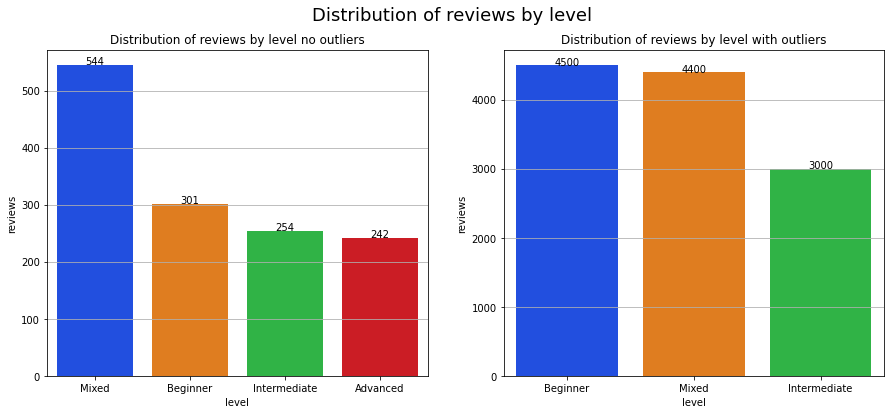

In [51]:
barplot_characteristics_by_reviews(data_courses_nooutliers, data_courses_outliers, labels=True, columns='level')

There no top courses with advanced level. The most popular courses are in common courses for beginers and mixed courses.

**4.3.4. Dependence between duration and reviews**

In [52]:
data_courses_nooutliers['category_duration'] = data_courses_nooutliers['duration'].apply(category)
data_courses_outliers['category_duration'] = data_courses_outliers['duration'].apply(category)

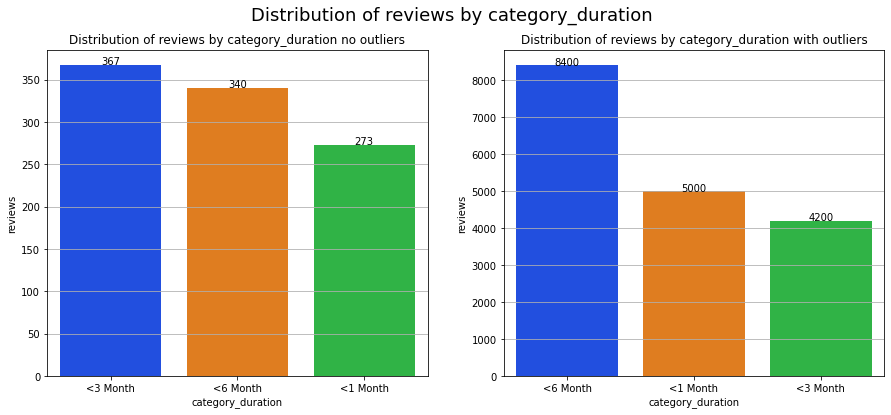

In [53]:
barplot_characteristics_by_reviews(data_courses_nooutliers, data_courses_outliers, labels=True, columns='category_duration')

The most viewed popular top courses have a duration from 3 to 6 months. The most popular duration for an average course is from 1 to 3 months. There are no dependence between duration of a course and the amount of reviews.

<a class="anchor" id="Step5"></a>
### 5.Conclusion

There are no obvious correlations between the count of course's reviews and other characteristics.

*It was mentioned that:*
- the most popular courses are from famous institutions (for example, Yale) and well-known companies (for example, Atlassian)
- there is no dependence between rating and reviews. An average rating for the popular courses is 4.5
- the skills students are interested in are not really different for average courses and for top-courses. The most popular skills are: Leadership and management, Enterpreneurship, Business psycology, Communication, Strategy and operations, Research and design
- the most viewed courses have a begginer or mixed level
- there is no obvious dependence between duration of a course and the count of reviews

*Recomendations for a future course:*
- it should have a begginer or mixed level
- it should study the following skills: Leadership and management, Enterpreneurship, Business psycology, Communication, Strategy and operations, Research and design